# model evaluation methods using R square, Adjusted R square and VIF  for a linear regression.

## Housing Case Study
## Problem Statement:
Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

• To identify the variables affecting house prices, e.g. area, number of rooms, 
bathrooms, etc.

• To create a linear model that quantitatively relates house prices with variables such 
as number of rooms, area, number of bathrooms, etc.

• To know the accuracy of the model, i.e. how well these variables can predict house 
prices.


## Step 1: Reading and Understanding the Data

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


housing = pd.read_csv("Housing.csv")

In [4]:
housing.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [5]:
housing.shape

(545, 13)

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
housing.describe()

price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000

## Step 2: Visualising the Data

### Visualising Numeric Variables

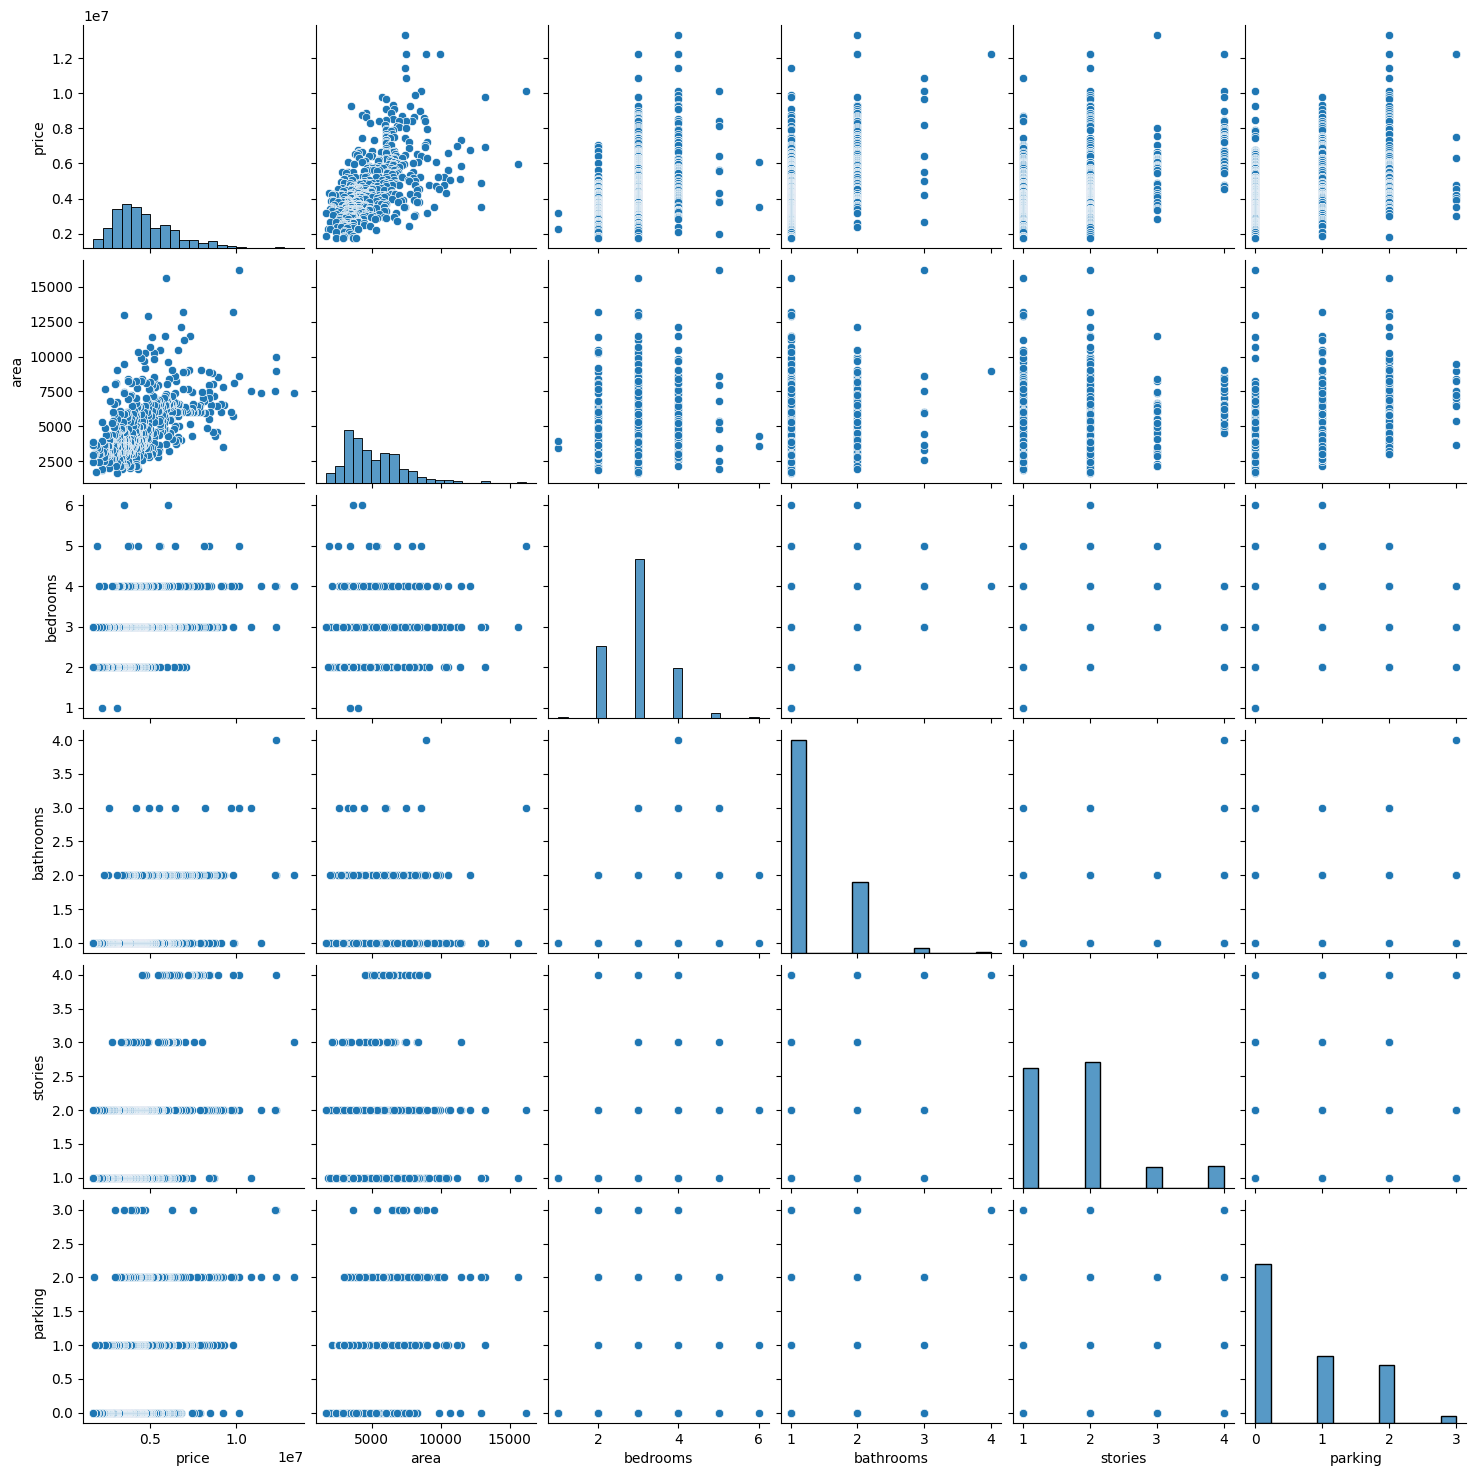

In [9]:
sns.pairplot(housing)
plt.show()

### Visualising Categorical Variables

<Axes: >

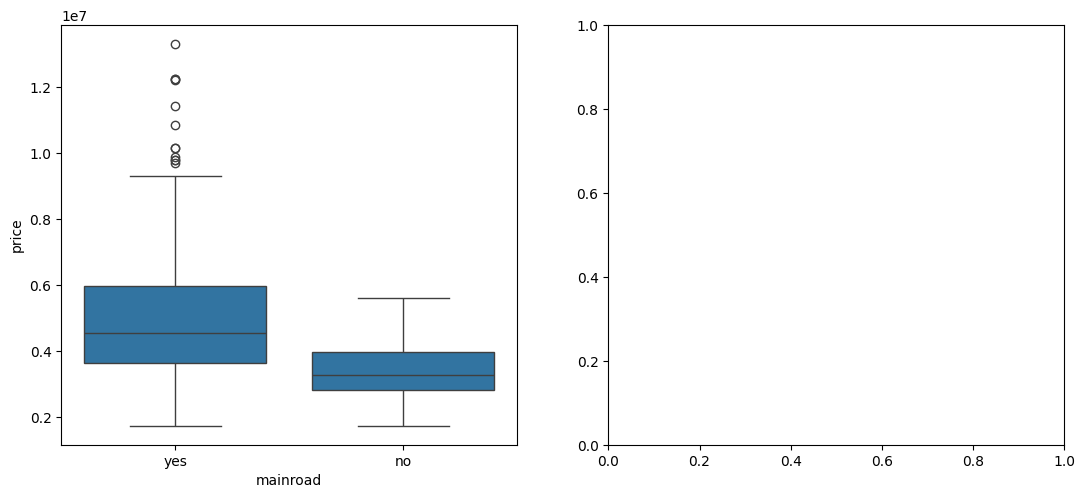

In [12]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)

sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)

<Axes: >

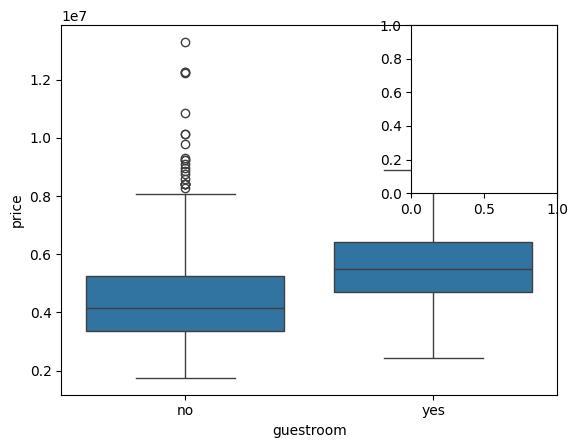

In [16]:
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)

<Axes: >

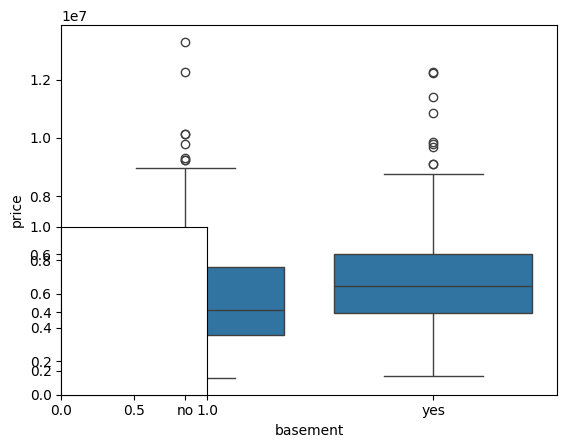

In [17]:
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)

<Axes: >

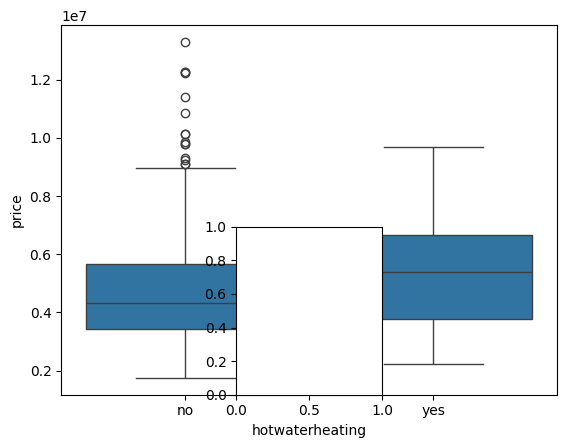

In [18]:
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)

<Axes: >

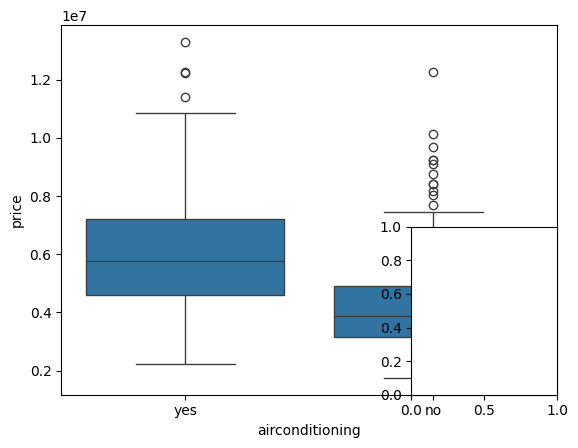

In [19]:
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)

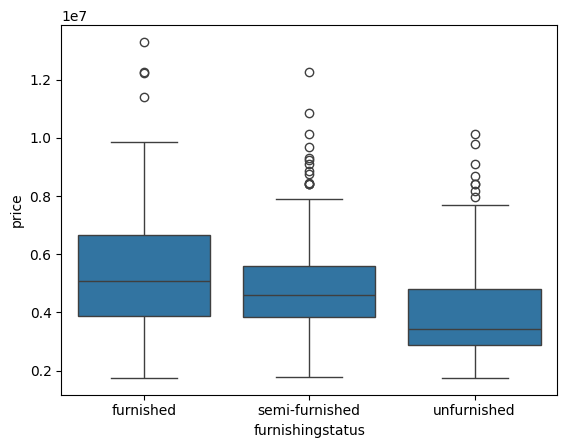

In [20]:
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

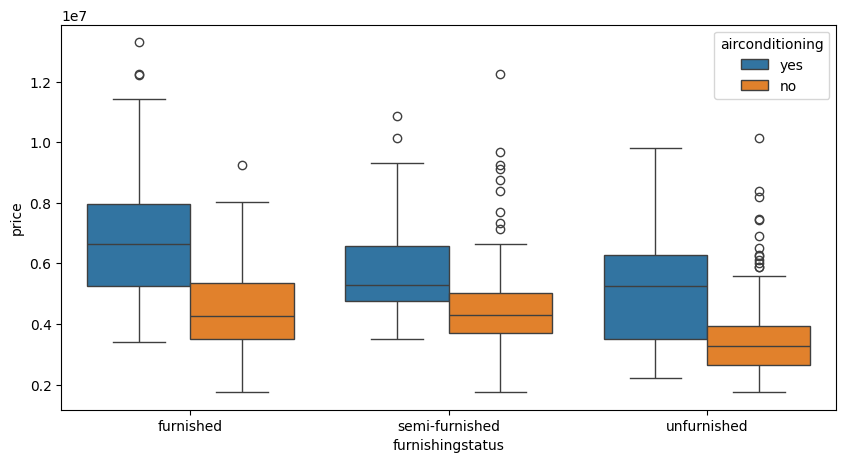

In [3]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue ='airconditioning', data = housing)
plt.show()

## Step 3: Data Preparation

You can see that your dataset has many columns with values as 'Yes' or 'No'.

But in order to fit a regression line, we would need numerical values and not string. 

Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.


In [22]:
# List of variables to map
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
'airconditioning', 'prefarea']
# Defining the map function
def binary_map(x):
 return x.map({'yes': 1, "no": 0})
# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
# Check the housing dataframe now
housing.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

  furnishingstatus  
0        furnished  
1        furnished  
2   semi-furnished  
3        furnished  
4        furnished

### Dummy Variables
The variable furnishingstatus has three levels. We need to convert these levels into integer as well.

For this, we will use something called dummy variables.


In [23]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(housing['furnishingstatus'])
# Check what the dataset 'status' looks like
status.head()

furnished  semi-furnished  unfurnished
0       True           False        False
1       True           False        False
2      False            True        False
3       True           False        False
4       True           False        False

In [24]:
# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(housing['furnishingstatus'], drop_first =True)

In [25]:
# Add the results to the original housing dataframe
housing = pd.concat([housing, status], axis = 1)


In [26]:
# Now let's see the head of our dataframe.
housing.head()


price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

  furnishingstatus  semi-furnished  unfurnished  
0        furnished           False        False  
1        furnished           False        False  
2   semi-furnished            True        False  
3        furnished           False        False  
4        furnished           False        False

In [27]:
# Drop 'furnishingstatus' as we have created the dummies for it
housing.drop(['furnishingstatus'], axis = 1, inplace = True)
housing.head()


price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   semi-furnished  unfurnished  
0           False        False  
1           False        False  
2            True        False  
3           False        False  
4           False        False

## Step 4: Splitting the Data into Training and Testing Sets

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features
As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for area, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

As you know, there are two common ways of rescaling:

1. Min-Max scaling

2. Standardisation (mean-0, sigma-1)

This time, we will use MinMax scaling.


In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy'  variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 
'parking','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
359  0.169697  0.155227       0.4        0.0  0.000000         1          0   
19   0.615152  0.403379       0.4        0.5  0.333333         1          0   
159  0.321212  0.115628       0.4        0.5  0.000000         1          1   
35   0.548133  0.454417       0.4        0.5  1.000000         1          0   
28   0.575758  0.538015       0.8        0.5  0.333333         1          0   

     basement  hotwaterheating  airconditioning   parking  prefarea  \
359         0                0                0  0.333333         0   
19          0                0                1  0.333333         1   
159         1                0                1  0.000000         0   
35          0                0                1  0.666667         0   
28          1                1                0  0.666667         0   

     semi-furnished  unfurnished  
359           False         True  
19             True        False  
159           False        False  
35            False        False  
28            False         True

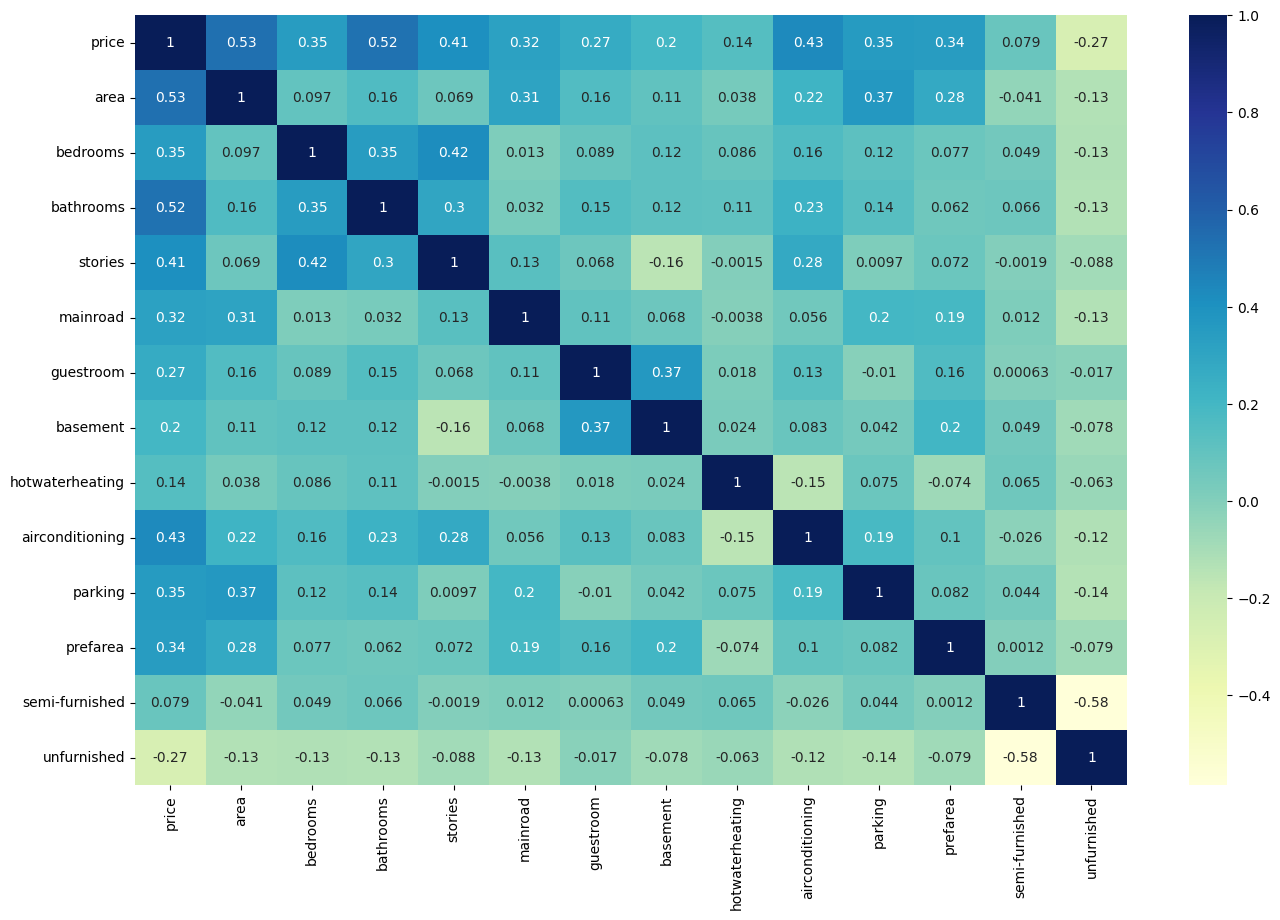

In [33]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

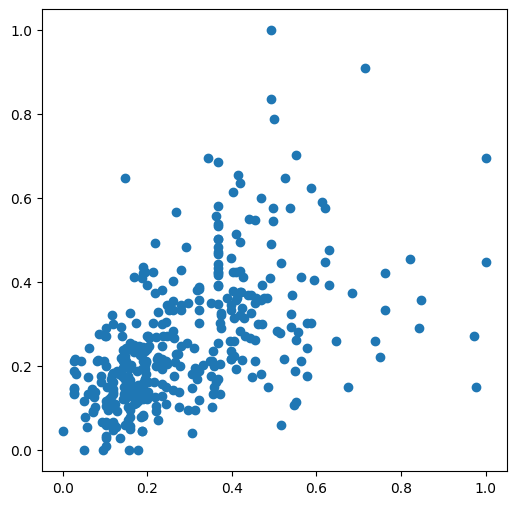

In [34]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.area, df_train.price)
plt.show()


So, we pick area as the first variable and we'll try to fit a regression line to that.

Dividing into X and Y sets for the model building


In [35]:
y_train = df_train.pop('price')
X_train = df_train

## Step 5: Building a linear model

Fit a regression line through the training data using statsmodels. Remember that in statsmodels, you need to explicitly fit a constant using sm.add_constant(X) because if we  don't perform this step, statsmodels fits a regression line passing through the origin, by  default.


In [36]:
import statsmodels.api as sm

In [37]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['area']])
# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
# Check the parameters obtained
lr.params

const    0.126894
area     0.462192
dtype: float64

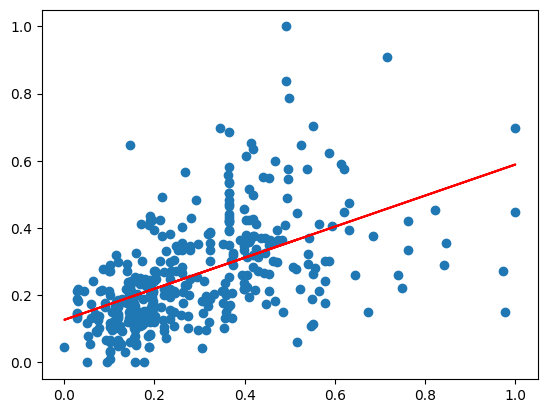

In [39]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 
'r')
plt.show()


In [40]:
# Print a summary of the linear regression model obtained
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           3.15e-29
Time:                        14:11:34   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.0

In [41]:
# Assign all the feature variables to X
X_train_lm = X_train[['area', 'bathrooms']]
# Build a linear model
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params


const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64

In [42]:

# Check the summary
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           2.51e-54
Time:                        14:12:27   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.0

In [43]:
# Assign all the feature variables to X
X_train_lm = X_train[['area', 'bathrooms','bedrooms']]
# Build a linear model
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params


const        0.041352
area         0.392211
bathrooms    0.259978
bedrooms     0.181863
dtype: float64

In [44]:
# Print the summary of the model
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           3.12e-57
Time:                        14:12:53   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.0

In [50]:
# Check all the columns of the dataframe
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [65]:
print(X_train.dtypes)


area               int64
bedrooms           int64
bathrooms          int64
stories            int64
mainroad           int64
guestroom          int64
basement           int64
hotwaterheating    int64
airconditioning    int64
parking            int64
prefarea           int64
semi-furnished      bool
unfurnished         bool
dtype: object


In [66]:
X_train['semi-furnished'] = X_train['semi-furnished'].astype(int)
X_train['unfurnished'] = X_train['unfurnished'].astype(int)

In [67]:
print(X_train.dtypes)

area               int64
bedrooms           int64
bathrooms          int64
stories            int64
mainroad           int64
guestroom          int64
basement           int64
hotwaterheating    int64
airconditioning    int64
parking            int64
prefarea           int64
semi-furnished     int32
unfurnished        int32
dtype: object


In [68]:
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Thu, 17 Apr 2025   Prob (F-statistic):          9.07e-123
Time:                        14:28:31   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.277e+04   2.64e+05     

In [69]:
housing.columns
#Build a linear model
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params

const               42771.693918
area                  244.139386
bedrooms           114787.560185
bathrooms          987668.107286
stories            450848.002859
mainroad           421272.588726
guestroom          300525.859636
basement           350106.904136
hotwaterheating    855447.145397
airconditioning    864958.311317
parking            277107.101342
prefarea           651543.799863
semi-furnished     -46344.619980
unfurnished       -411234.386157
dtype: float64

In [70]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Thu, 17 Apr 2025   Prob (F-statistic):          9.07e-123
Time:                        14:29:05   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.277e+04   2.64e+05     

In [71]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in
range(X_train.shape[1])]

In [74]:
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1          bedrooms  16.65
2         bathrooms   9.42
0              area   8.28
3           stories   7.88
4          mainroad   6.88
11   semi-furnished   2.39
6          basement   2.02
12      unfurnished   2.01
9           parking   1.99
8   airconditioning   1.77
10         prefarea   1.49
5         guestroom   1.47
7   hotwaterheating   1.09